<a href="https://colab.research.google.com/github/mcmaharrey/MLA_MCM/blob/main/MLA2_MCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matthew Maharrey <br>
Machine Learning Assignment 2 <br>
CS430-ON <br>
Machine Learning in the Cloud

**IMPORTS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

**Problem 1**

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')


In [ ]:
df.columns = ['date', 'usage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm', 'week_status', 'day_of_week', 'load_type']


In [ ]:
#Summarize the numerical columns of data.
summary = df.describe()

#Get the counts of the different load types
load_type_counts = df['load_type'].value_counts()
load_type_df = pd.DataFrame(load_type_counts)

#10x5 barplot
plt.figure(figsize=(10, 5))
plt.bar(load_type_df.index, load_type_df['load_type'])
plt.title('Total Days for Different Load Types')
plt.xlabel('Load Type')
plt.ylabel('Days')
plt.show()


In [ ]:
#pairplot
sns.pairplot(df)
plt.show()


I notice that in 6 data sets show a postive trend and in others the data trends down, and there are a few that the data is all over the place

In [ ]:
X = df.drop(columns=['date', 'usage_kwh'])
y = df[['usage_kwh']]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Display the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (28032, 9)
X_test shape: (7008, 9)
y_train shape: (28032, 1)
y_test shape: (7008, 1)


In [ ]:
num_attribs = X.select_dtypes(include=['int', 'float']).columns.tolist()
cat_attribs = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
col_transform = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), cat_attribs),
    ('num', MinMaxScaler(), num_attribs)
    ],
    remainder='passthrough'
)

In [ ]:
pipeline = Pipeline([
    ('transform', col_transform),
    ('mlr_model', LinearRegression()),
])

In [ ]:
set_config(display='diagram')
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('mlr_model', LinearRegression())])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('mlr_model', LinearRegression())])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
y_train_pred = pipeline.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(train_rmse)

4.58316622126044


In [ ]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(test_rmse)

5.049590596342929


In [ ]:
r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.9768619453437246


The RMSE for the training set is 4.58 <br>
The RMSE for the test set is 5.04 <br>
The R squared is 0.97

The values are low and can suggest that the predictions are close to the actual values.
The R squared value shows that 97% of kWh is explained in the model

In [ ]:
pipeline.named_steps['mlr_model'].intercept_

array([3.44915748e+14])

In [ ]:
pipeline.named_steps['mlr_model'].coef_

array([[-5.08872671e+13, -3.90983168e+13, -6.89619855e+13,
        -6.89619855e+13, -8.07509358e+13, -8.07509358e+13,
        -6.89619855e+13, -6.89619855e+13, -6.89619855e+13,
        -2.25066496e+14, -2.25066496e+14, -2.25066496e+14,
         2.90083845e+01,  1.91419272e+00,  1.17473851e+02,
         6.99739086e+00,  4.74945300e+00, -3.54024887e-01]])

The values that were returned from the tests show that the model will be good at predecting the kWh usage. The intercept value and the coefficients show the relationship of input features to kWh usage.

In [ ]:
print(df)

                   date  usage_kwh  lag_react_pwr_kvarh  lead_react_pwr_kvarh  \
0      01/01/2018 00:15       3.17                 2.95                  0.00   
1      01/01/2018 00:30       4.00                 4.46                  0.00   
2      01/01/2018 00:45       3.24                 3.28                  0.00   
3      01/01/2018 01:00       3.31                 3.56                  0.00   
4      01/01/2018 01:15       3.82                 4.50                  0.00   
...                 ...        ...                  ...                   ...   
35035  31/12/2018 23:00       3.85                 4.86                  0.00   
35036  31/12/2018 23:15       3.74                 3.74                  0.00   
35037  31/12/2018 23:30       3.78                 3.17                  0.07   
35038  31/12/2018 23:45       3.78                 3.06                  0.11   
35039  31/12/2018 00:00       3.67                 3.02                  0.07   

       CO2(tCO2)  lag_curre

**Problem 2**

In [ ]:
week_status_mapping = {'Weekday': 1, 'Weekend': 0}
df['week_status'] = df['week_status'].replace(week_status_mapping)

In [ ]:
print(df)

                   date  usage_kwh  lag_react_pwr_kvarh  lead_react_pwr_kvarh  \
0      01/01/2018 00:15       3.17                 2.95                  0.00   
1      01/01/2018 00:30       4.00                 4.46                  0.00   
2      01/01/2018 00:45       3.24                 3.28                  0.00   
3      01/01/2018 01:00       3.31                 3.56                  0.00   
4      01/01/2018 01:15       3.82                 4.50                  0.00   
...                 ...        ...                  ...                   ...   
35035  31/12/2018 23:00       3.85                 4.86                  0.00   
35036  31/12/2018 23:15       3.74                 3.74                  0.00   
35037  31/12/2018 23:30       3.78                 3.17                  0.07   
35038  31/12/2018 23:45       3.78                 3.06                  0.11   
35039  31/12/2018 00:00       3.67                 3.02                  0.07   

       CO2(tCO2)  lag_curre

In [ ]:
X = df.drop(columns=['date', 'week_status', 'day_of_week'])

In [ ]:
y = df[['week_status']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
numerical_columns = X.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
column_transformer = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numerical_columns),
    ('cat', OneHotEncoder(), categorical_columns[:-1])
])

In [ ]:
pipeline = Pipeline([
    ('transformer', column_transformer),
    ('classifier', LogisticRegression())
])

In [ ]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['usage_kwh',
                                                   'lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr', 'nsm']),
                                                 ('cat', OneHotEncoder(),
                                                  [])])),
                ('classifier', LogisticRegression())])

In [ ]:
y_pred = pipeline.predict(X_test)

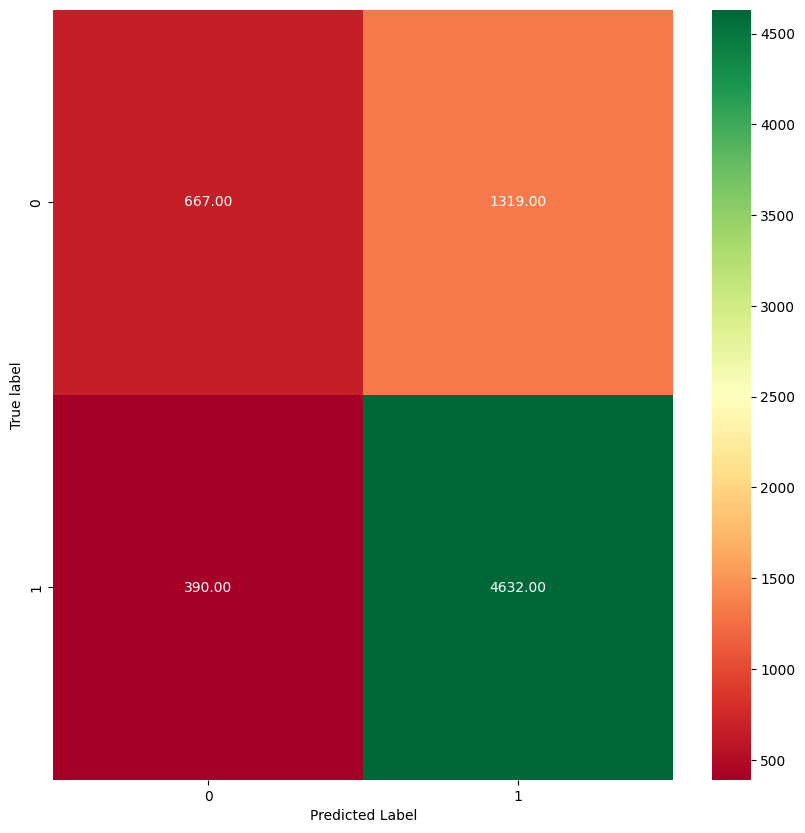

In [ ]:
plot_cm(y_test, y_pred)

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print(precision)
print(recall)
print(f1)

0.7783565787262645
0.9223416965352449
0.8442540781919257


The precision is 77% which means that 77% of the instances were postitive. <br>
The recall is 92% which is the percentage of actual positives. <br>
The F1 score is 0.84 and shows a good balance between the recall and precision

In [ ]:
y_pred_proba = pipeline.predict_proba(X_test)

In [ ]:
y_pred_proba

array([[0.26411781, 0.73588219],
       [0.34761454, 0.65238546],
       [0.65207764, 0.34792236],
       ...,
       [0.05954743, 0.94045257],
       [0.67410401, 0.32589599],
       [0.63559206, 0.36440794]])

0.7438620522871571


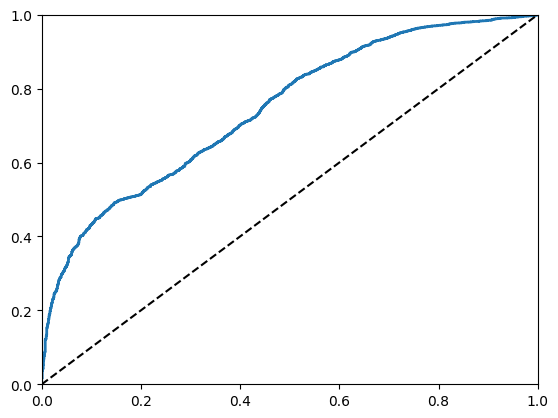

In [ ]:
y_pred_proba = pipeline.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plot_roc_curve(fpr, tpr)
print(roc_auc_score(y_test, y_pred_proba))

The AUC for the ROC is 0.743 which we want the value to be as close to 1. <br>
I chose the ROC curve because it is good a t rainng instances across all thresholds and when we calcualted the percision, recall, and F1 the values
were good enought that I used an ROC curve.

With the values that I got from the precision, recall, and F1 scores I feel that the model is a good at predecting week status. The precision is lower than I would want at 77% but the recall and F1 are in ranges that I am good with. The AUC value shows that the model is good at looking between positive and negative instances.